In [1]:
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

## Load Data

In [2]:
train = pd.read_csv('data/train.csv')
weather = pd.read_csv('data/weather.csv')
train['id'] = train.index
# train.shape

In [3]:
# Create a function to rename columns to lower case
def columns_rename(columns):
    """ Rename column names to lower case"""
    return columns.lower()

train.columns = [columns_rename(col) for col in train.columns]
weather.columns = [columns_rename(col) for col in weather.columns]

In [4]:
train['date'] = pd.to_datetime(train['date'])
weather['date'] = pd.to_datetime(weather['date'])

In [5]:
# set date to be index
# weather.set_index('date', inplace=True)

# sort index
# weather.sort_index(inplace=True)

## Cleaning and EDA of Weather Data

## Tmax

(array([ 30.,  98., 164., 312., 389., 492., 807., 495., 135.,  22.]),
 array([ 41. ,  47.3,  53.6,  59.9,  66.2,  72.5,  78.8,  85.1,  91.4,
         97.7, 104. ]),
 <BarContainer object of 10 artists>)

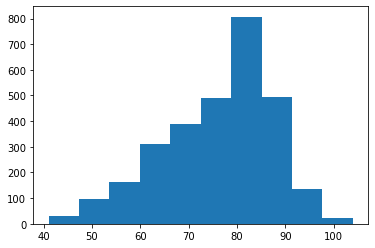

In [6]:
plt.hist(weather['tmax'])

In [7]:
weather['tmax'].describe()

count    2944.000000
mean       76.166101
std        11.461970
min        41.000000
25%        69.000000
50%        78.000000
75%        85.000000
max       104.000000
Name: tmax, dtype: float64

## Tmin

(array([ 42., 103., 289., 332., 354., 610., 541., 522., 129.,  22.]),
 array([29. , 34.4, 39.8, 45.2, 50.6, 56. , 61.4, 66.8, 72.2, 77.6, 83. ]),
 <BarContainer object of 10 artists>)

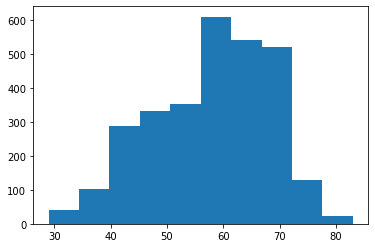

In [8]:
plt.hist(weather['tmin'])

(array([ 42., 103., 289., 332., 354., 610., 541., 522., 129.,  22.]),
 array([29. , 34.4, 39.8, 45.2, 50.6, 56. , 61.4, 66.8, 72.2, 77.6, 83. ]),
 <BarContainer object of 10 artists>)

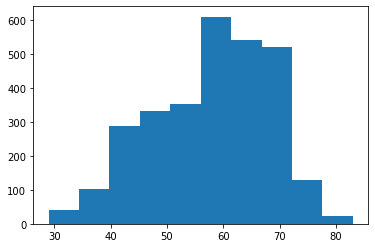

In [9]:
plt.hist(weather['tmin'])

## Tavg

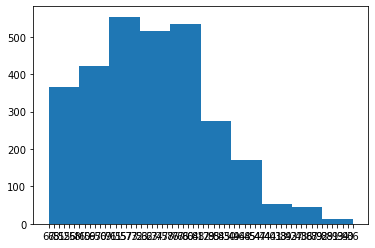

In [13]:
plt.hist(weather['tavg']);

In [14]:
weather['tavg'].value_counts();

There are 11 'M' values, which are missing values

In [15]:
def impute_missing_tavg(row):
    if row['tavg'] == 'M': 
        row['tavg'] = (row['tmax'] + row['tmin']) * 0.5 
    return row



In [16]:
weather = weather.apply(impute_missing_tavg, axis = 1)


In [17]:
#weather.info()

In [18]:
weather.tavg = weather.tavg.astype('int64')

## Sunrise and Sunset

In [19]:
station1 = weather[weather['station']==1].copy()
station2 = weather[weather['station']==2].copy()

In [20]:
station1.reset_index(inplace=True)

In [21]:
station2.reset_index(inplace=True)

In [22]:
weather[weather['tavg']=="M"]

,station,date,tmax,tmin,tavg,depart,dewpoint,wetbulb,heat,cool,...,codesum,depth,water1,snowfall,preciptotal,stnpressure,sealevel,resultspeed,resultdir,avgspeed


In [23]:
station2["sunrise"].head()

0    -
1    -
2    -
3    -
4    -
Name: sunrise, dtype: object

In [24]:
station2["sunrise"]= station1["sunrise"]

In [25]:
station2["sunrise"].head()

0    0448
1    0447
2    0446
3    0444
4    0443
Name: sunrise, dtype: object

In [26]:
weather = pd.concat([station1,station2],axis=0)


In [27]:
weather.reset_index().head()

,level_0,index,station,date,tmax,tmin,tavg,depart,dewpoint,wetbulb,...,codesum,depth,water1,snowfall,preciptotal,stnpressure,sealevel,resultspeed,resultdir,avgspeed
0,0,0,1,2007-05-01,83,50,67,14,51,56,...,,0,M,0.0,0.00,29.10,29.82,1.7,27,9.2
1,1,2,1,2007-05-02,59,42,51,-3,42,47,...,BR,0,M,0.0,0.00,29.38,30.09,13.0,4,13.4
2,2,4,1,2007-05-03,66,46,56,2,40,48,...,,0,M,0.0,0.00,29.39,30.12,11.7,7,11.9
3,3,6,1,2007-05-04,66,49,58,4,41,50,...,RA,0,M,0.0,T,29.31,30.05,10.4,8,10.8
4,4,8,1,2007-05-05,66,53,60,5,38,49,...,,0,M,0.0,T,29.40,30.10,11.7,7,12.0


In [28]:

weather.drop(columns=["index"],inplace = True)

## Depart

(array([ 335.,  177.,  149.,  239.,  210.,  264.,   27.,   31.,   28.,
        1484.]),
 array([ 0. ,  4.1,  8.2, 12.3, 16.4, 20.5, 24.6, 28.7, 32.8, 36.9, 41. ]),
 <BarContainer object of 10 artists>)

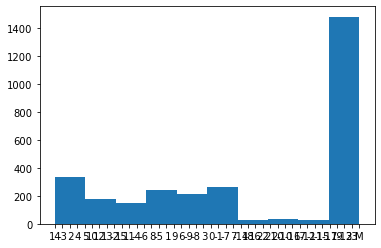

In [29]:
plt.hist(weather['depart'])

In [30]:
weather['depart'].value_counts();

In [31]:
weather.head(6)

,station,date,tmax,tmin,tavg,depart,dewpoint,wetbulb,heat,cool,...,codesum,depth,water1,snowfall,preciptotal,stnpressure,sealevel,resultspeed,resultdir,avgspeed
0,1,2007-05-01,83,50,67,14,51,56,0,2,...,,0,M,0.0,0.00,29.10,29.82,1.7,27,9.2
1,1,2007-05-02,59,42,51,-3,42,47,14,0,...,BR,0,M,0.0,0.00,29.38,30.09,13.0,4,13.4
2,1,2007-05-03,66,46,56,2,40,48,9,0,...,,0,M,0.0,0.00,29.39,30.12,11.7,7,11.9
3,1,2007-05-04,66,49,58,4,41,50,7,0,...,RA,0,M,0.0,T,29.31,30.05,10.4,8,10.8
4,1,2007-05-05,66,53,60,5,38,49,5,0,...,,0,M,0.0,T,29.40,30.10,11.7,7,12.0
5,1,2007-05-06,68,49,59,4,30,46,6,0,...,,0,M,0.0,0.00,29.57,30.29,14.4,11,15.0


In [32]:
station1 = weather[weather['station']==1].copy()
station2 = weather[weather['station']==2].copy()


In [33]:
station1.reset_index(inplace=True)

In [34]:
station2.reset_index(inplace=True)

In [35]:
station1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1472 entries, 0 to 1471
Data columns (total 23 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   index        1472 non-null   int64         
 1   station      1472 non-null   int64         
 2   date         1472 non-null   datetime64[ns]
 3   tmax         1472 non-null   int64         
 4   tmin         1472 non-null   int64         
 5   tavg         1472 non-null   int64         
 6   depart       1472 non-null   object        
 7   dewpoint     1472 non-null   int64         
 8   wetbulb      1472 non-null   object        
 9   heat         1472 non-null   object        
 10  cool         1472 non-null   object        
 11  sunrise      1472 non-null   object        
 12  sunset       1472 non-null   object        
 13  codesum      1472 non-null   object        
 14  depth        1472 non-null   object        
 15  water1       1472 non-null   object        
 16  snowfa

In [36]:
station1.depart= station1.depart.astype('int64')

In [37]:
station2["depart"] = station2["tavg"] - (station1["tavg"]- station1["depart"]) 

In [38]:
station2["depart"]

0       15
1       -2
2        4
3       10
4        5
        ..
1467    19
1468    10
1469    -2
1470    -1
1471    -4
Name: depart, Length: 1472, dtype: int64

In [39]:
weather = pd.concat([station1,station2],axis=0)
weather.reset_index().head()
weather.drop(columns=["index"],inplace = True)

In [40]:
weather.tail()

,station,date,tmax,tmin,tavg,depart,dewpoint,wetbulb,heat,cool,...,codesum,depth,water1,snowfall,preciptotal,stnpressure,sealevel,resultspeed,resultdir,avgspeed
1467,2,2014-10-27,79,54,67,19,52,59,0,2,...,RA,M,M,M,0.02,29.00,29.67,12.7,19,13.6
1468,2,2014-10-28,66,48,57,10,40,48,8,0,...,RA,M,M,M,0.03,29.23,29.85,14.0,26,14.6
1469,2,2014-10-29,49,40,45,-2,34,42,20,0,...,,M,M,M,0.00,29.42,30.07,8.5,29,9.0
1470,2,2014-10-30,53,37,45,-1,35,42,20,0,...,RA,M,M,M,T,29.41,30.10,5.9,23,6.5
1471,2,2014-10-31,49,34,42,-4,29,36,23,0,...,RA SN BR,M,M,M,0.04,29.54,30.20,21.7,34,22.6


## Dewpoint

(array([ 26.,  89., 146., 308., 323., 459., 624., 467., 393., 109.]),
 array([22. , 27.3, 32.6, 37.9, 43.2, 48.5, 53.8, 59.1, 64.4, 69.7, 75. ]),
 <BarContainer object of 10 artists>)

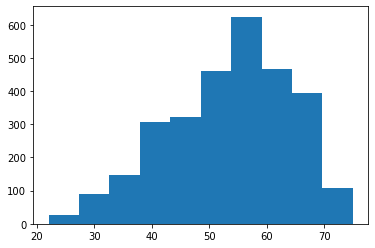

In [41]:
plt.hist(weather['dewpoint'])

In [42]:
weather['dewpoint'].describe()

count    2944.000000
mean       53.457880
std        10.675181
min        22.000000
25%        46.000000
50%        54.000000
75%        62.000000
max        75.000000
Name: dewpoint, dtype: float64

## Heat and Cool

(array([1952.,  155.,  185.,  214.,  172.,  100.,   87.,   26.,   24.,
          29.]),
 array([ 0.,  3.,  6.,  9., 12., 15., 18., 21., 24., 27., 30.]),
 <BarContainer object of 10 artists>)

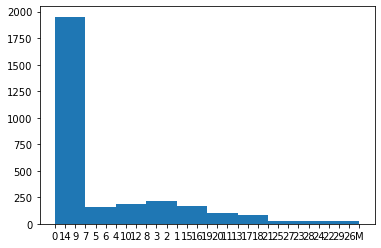

In [43]:
plt.hist(weather['heat'])

In [44]:
weather['heat'].describe()

count     2944
unique      31
top          0
freq      1870
Name: heat, dtype: object

In [45]:
weather['heat'].value_counts()

0     1870
4       88
1       86
2       81
8       67
3       66
5       61
15      57
12      49
7       49
10      48
11      48
9       46
13      46
6       45
14      36
16      29
20      28
18      24
19      24
21      19
17      17
23      15
22      12
M       11
24       7
25       5
26       4
27       2
28       2
29       2
Name: heat, dtype: int64

In [46]:
weather.head(10)

,station,date,tmax,tmin,tavg,depart,dewpoint,wetbulb,heat,cool,...,codesum,depth,water1,snowfall,preciptotal,stnpressure,sealevel,resultspeed,resultdir,avgspeed
0,1,2007-05-01,83,50,67,14,51,56,0,2,...,,0,M,0.0,0.00,29.10,29.82,1.7,27,9.2
1,1,2007-05-02,59,42,51,-3,42,47,14,0,...,BR,0,M,0.0,0.00,29.38,30.09,13.0,4,13.4
2,1,2007-05-03,66,46,56,2,40,48,9,0,...,,0,M,0.0,0.00,29.39,30.12,11.7,7,11.9
3,1,2007-05-04,66,49,58,4,41,50,7,0,...,RA,0,M,0.0,T,29.31,30.05,10.4,8,10.8
4,1,2007-05-05,66,53,60,5,38,49,5,0,...,,0,M,0.0,T,29.40,30.10,11.7,7,12.0
5,1,2007-05-06,68,49,59,4,30,46,6,0,...,,0,M,0.0,0.00,29.57,30.29,14.4,11,15.0
6,1,2007-05-07,83,47,65,10,41,54,0,0,...,RA,0,M,0.0,T,29.38,30.12,8.6,18,10.5
7,1,2007-05-08,82,54,68,12,58,62,0,3,...,BR,0,M,0.0,0.00,29.29,30.03,2.7,11,5.8
8,1,2007-05-09,77,61,69,13,59,63,0,4,...,BR HZ,0,M,0.0,0.13,29.21,29.94,3.9,9,6.2
9,1,2007-05-10,84,56,70,14,52,60,0,5,...,BR,0,M,0.0,0.00,29.20,29.92,0.7,17,4.1


It appears that heat has a value when it tavg is below 65, and takes on a value of 65-tavg, while cool has a value when tavg is above 65, and takes on a value of tavg-65. On the documentation this reads as "Heating" and "Cooling", which might refer to the heating and cooling effect required.

In [47]:
def impute_missing_heat_cool(row): 
    if row['heat'] == 'M':
        if row['tavg'] < 65: 
            row['heat'] = 65 - row['tavg']
            row['cool'] = 0
        else: 
            row['heat'] = 0
            row['cool'] = row['tavg'] - 65
    return row

In [48]:
weather = weather.apply(impute_missing_heat_cool, axis = 1)


In [49]:
weather.head()

,station,date,tmax,tmin,tavg,depart,dewpoint,wetbulb,heat,cool,...,codesum,depth,water1,snowfall,preciptotal,stnpressure,sealevel,resultspeed,resultdir,avgspeed
0,1,2007-05-01,83,50,67,14,51,56,0,2,...,,0,M,0.0,0.00,29.10,29.82,1.7,27,9.2
1,1,2007-05-02,59,42,51,-3,42,47,14,0,...,BR,0,M,0.0,0.00,29.38,30.09,13.0,4,13.4
2,1,2007-05-03,66,46,56,2,40,48,9,0,...,,0,M,0.0,0.00,29.39,30.12,11.7,7,11.9
3,1,2007-05-04,66,49,58,4,41,50,7,0,...,RA,0,M,0.0,T,29.31,30.05,10.4,8,10.8
4,1,2007-05-05,66,53,60,5,38,49,5,0,...,,0,M,0.0,T,29.40,30.10,11.7,7,12.0


In [50]:
weather[weather['heat']=="M"]

,station,date,tmax,tmin,tavg,depart,dewpoint,wetbulb,heat,cool,...,codesum,depth,water1,snowfall,preciptotal,stnpressure,sealevel,resultspeed,resultdir,avgspeed


## Depth

(array([1472.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
        1472.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

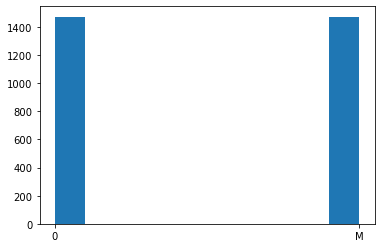

In [51]:
plt.hist(weather['depth'])

In [52]:
weather['depth'].describe()

count     2944
unique       2
top          0
freq      1472
Name: depth, dtype: object

In [53]:
weather['depth'] = 0

## Water 1

(array([   0.,    0.,    0.,    0.,    0., 2944.,    0.,    0.,    0.,
           0.]),
 array([-0.5, -0.4, -0.3, -0.2, -0.1,  0. ,  0.1,  0.2,  0.3,  0.4,  0.5]),
 <BarContainer object of 10 artists>)

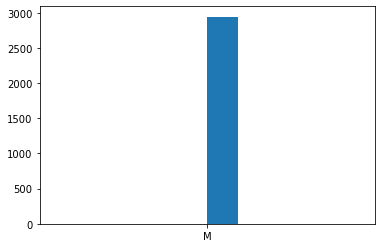

In [57]:
plt.hist(weather['water1'])

In [58]:
weather['water1'].describe()

count     2944
unique       1
top          M
freq      2944
Name: water1, dtype: object

## SnowFall

(array([1.459e+03, 0.000e+00, 0.000e+00, 1.200e+01, 0.000e+00, 0.000e+00,
        1.000e+00, 0.000e+00, 0.000e+00, 1.472e+03]),
 array([0. , 0.3, 0.6, 0.9, 1.2, 1.5, 1.8, 2.1, 2.4, 2.7, 3. ]),
 <BarContainer object of 10 artists>)

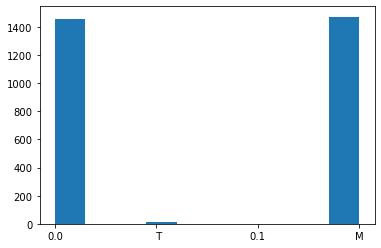

In [59]:
plt.hist(weather['snowfall'])

In [60]:
weather['snowfall'].describe()

count     2944
unique       4
top          M
freq      1472
Name: snowfall, dtype: object

In [64]:
weather[["date","station","snowfall"]].head(20)

,date,station,snowfall
0,2007-05-01,1,0.0
1,2007-05-02,1,0.0
2,2007-05-03,1,0.0
3,2007-05-04,1,0.0
4,2007-05-05,1,0.0
5,2007-05-06,1,0.0
6,2007-05-07,1,0.0
7,2007-05-08,1,0.0
8,2007-05-09,1,0.0
9,2007-05-10,1,0.0


In [65]:
station1 = weather[weather['station']==1].copy()
station2 = weather[weather['station']==2].copy()
station1.reset_index(inplace=True)
station2.reset_index(inplace=True)

In [66]:
station2["snowfall"]= station1["snowfall"]

In [67]:
weather = pd.concat([station1,station2],axis=0)
weather.reset_index().head()
weather.drop(columns=["index"],inplace = True)

## PrecipTotal

(array([2281.,  217.,  135.,   55.,   81.,   56.,   42.,   35.,   22.,
          20.]),
 array([  0. ,  16.7,  33.4,  50.1,  66.8,  83.5, 100.2, 116.9, 133.6,
        150.3, 167. ]),
 <BarContainer object of 10 artists>)

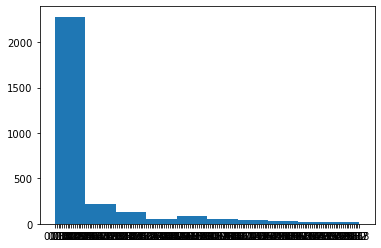

In [68]:
plt.hist(weather['preciptotal'])

In [69]:
weather['preciptotal'].describe()

count     2944
unique     168
top       0.00
freq      1577
Name: preciptotal, dtype: object

In [70]:
count = 0
for i in weather['preciptotal']:
    if i == "M":
        count += 1
print(count)

2


In [71]:
weather[weather['preciptotal'] =="M"]

,station,date,tmax,tmin,tavg,depart,dewpoint,wetbulb,heat,cool,...,codesum,depth,water1,snowfall,preciptotal,stnpressure,sealevel,resultspeed,resultdir,avgspeed
58,2,2007-06-28,73,61,67,-4,56,61,0,2,...,,0,M,0.0,M,29.43,30.07,12.2,2,13.3
59,2,2007-06-29,71,56,64,-7,56,60,1,0,...,,0,M,0.0,M,29.47,30.11,7.4,2,8.2


In [72]:
weather[weather['date'] =="2007-06-28"]

,station,date,tmax,tmin,tavg,depart,dewpoint,wetbulb,heat,cool,...,codesum,depth,water1,snowfall,preciptotal,stnpressure,sealevel,resultspeed,resultdir,avgspeed
58,1,2007-06-28,74,58,66,-5,55,60,0,1,...,,0,M,0.0,0.00,29.41,30.09,11.9,3,12.5
58,2,2007-06-28,73,61,67,-4,56,61,0,2,...,,0,M,0.0,M,29.43,30.07,12.2,2,13.3


In [73]:
weather[weather['date'] =="2007-06-29"]

,station,date,tmax,tmin,tavg,depart,dewpoint,wetbulb,heat,cool,...,codesum,depth,water1,snowfall,preciptotal,stnpressure,sealevel,resultspeed,resultdir,avgspeed
59,1,2007-06-29,70,56,63,-8,55,59,2,0,...,,0,M,0.0,0.00,29.41,30.13,7.6,2,8.3
59,2,2007-06-29,71,56,64,-7,56,60,1,0,...,,0,M,0.0,M,29.47,30.11,7.4,2,8.2


We will adjust the precip total down to 0.

In [74]:
def impute_missing_precip(row): 
    if row['preciptotal'] == 'M':
        row['preciptotal'] = 0
    return row

In [75]:
weather = weather.apply(impute_missing_precip, axis = 1)

In [76]:
weather[weather['preciptotal'] =="M"]

,station,date,tmax,tmin,tavg,depart,dewpoint,wetbulb,heat,cool,...,codesum,depth,water1,snowfall,preciptotal,stnpressure,sealevel,resultspeed,resultdir,avgspeed


## StnPressure

(array([749., 677., 422., 432., 254.,  64., 178., 112.,  33.,  23.]),
 array([  0. ,  10.3,  20.6,  30.9,  41.2,  51.5,  61.8,  72.1,  82.4,
         92.7, 103. ]),
 <BarContainer object of 10 artists>)

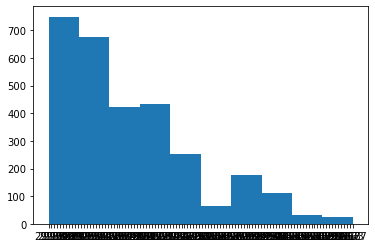

In [79]:
plt.hist(weather['stnpressure'])

In [80]:
weather['stnpressure'].describe()

count      2944
unique      104
top       29.34
freq        128
Name: stnpressure, dtype: object

In [81]:
count = 0
for i in weather['stnpressure']:
    if i == "M":
        count += 1
print(count)

4


In [82]:
weather[weather['stnpressure'] =="M"]

,station,date,tmax,tmin,tavg,depart,dewpoint,wetbulb,heat,cool,...,codesum,depth,water1,snowfall,preciptotal,stnpressure,sealevel,resultspeed,resultdir,avgspeed
424,1,2009-06-26,86,69,78,7,60,M,0,13,...,,0,M,0.0,0.00,M,29.85,6.4,4,8.2
1205,1,2013-08-10,81,64,73,0,57,M,0,8,...,,0,M,0.0,0.00,M,30.08,5.3,5,6.5
43,2,2007-06-13,86,68,77,9,53,62,0,12,...,,0,M,0.0,0.00,M,M,7.0,5,M
1205,2,2013-08-10,81,68,75,2,55,63,0,10,...,,0,M,0.0,0.00,M,30.07,6.0,6,7.4


In [83]:
weather[weather['date'] =="2007-06-26"]

,station,date,tmax,tmin,tavg,depart,dewpoint,wetbulb,heat,cool,...,codesum,depth,water1,snowfall,preciptotal,stnpressure,sealevel,resultspeed,resultdir,avgspeed
56,1,2007-06-26,92,70,81,10,69,72,0,16,...,TSRA BR HZ VCTS,0,M,0.0,0.16,29.39,30.11,6.1,22,7.1
56,2,2007-06-26,91,73,82,11,69,72,0,17,...,BR HZ,0,M,0.0,T,29.45,30.09,7.3,21,8.1


In [84]:
weather[weather['date'] =="2013-08-10"]

,station,date,tmax,tmin,tavg,depart,dewpoint,wetbulb,heat,cool,...,codesum,depth,water1,snowfall,preciptotal,stnpressure,sealevel,resultspeed,resultdir,avgspeed
1205,1,2013-08-10,81,64,73,0,57,M,0,8,...,,0,M,0.0,0.00,M,30.08,5.3,5,6.5
1205,2,2013-08-10,81,68,75,2,55,63,0,10,...,,0,M,0.0,0.00,M,30.07,6.0,6,7.4


In [85]:
weather[weather['date'] =="2007-06-13"]

,station,date,tmax,tmin,tavg,depart,dewpoint,wetbulb,heat,cool,...,codesum,depth,water1,snowfall,preciptotal,stnpressure,sealevel,resultspeed,resultdir,avgspeed
43,1,2007-06-13,87,60,74,6,53,62,0,9,...,,0,M,0.0,0.00,29.36,30.09,7.2,5,8.6
43,2,2007-06-13,86,68,77,9,53,62,0,12,...,,0,M,0.0,0.00,M,M,7.0,5,M


In [86]:
weather[weather['date'] =="2013-08-10"]

,station,date,tmax,tmin,tavg,depart,dewpoint,wetbulb,heat,cool,...,codesum,depth,water1,snowfall,preciptotal,stnpressure,sealevel,resultspeed,resultdir,avgspeed
1205,1,2013-08-10,81,64,73,0,57,M,0,8,...,,0,M,0.0,0.00,M,30.08,5.3,5,6.5
1205,2,2013-08-10,81,68,75,2,55,63,0,10,...,,0,M,0.0,0.00,M,30.07,6.0,6,7.4


In [87]:
We will just use the average of the station pressures?

Object `pressures` not found.


In [ ]:
We will just use the average of the station pressures

## SeaLevel

(array([619., 473., 330., 568., 402., 210., 156.,  95.,  61.,  30.]),
 array([  0. ,  10.1,  20.2,  30.3,  40.4,  50.5,  60.6,  70.7,  80.8,
         90.9, 101. ]),
 <BarContainer object of 10 artists>)

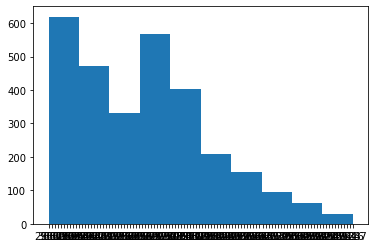

In [88]:
plt.hist(weather['sealevel'])

In [89]:
weather['sealevel'].describe()

count      2944
unique      102
top       30.00
freq         96
Name: sealevel, dtype: object

In [90]:
count = 0
for i in weather['sealevel']:
    if i == "M":
        count += 1
print(count)

9


In [91]:
weather[weather['sealevel'] =="M"]

,station,date,tmax,tmin,tavg,depart,dewpoint,wetbulb,heat,cool,...,codesum,depth,water1,snowfall,preciptotal,stnpressure,sealevel,resultspeed,resultdir,avgspeed
416,1,2009-06-18,80,61,71,1,63,67,0,6,...,RA BR,0,M,0.0,0.12,29.08,M,6.7,16,7.9
497,1,2009-09-07,77,59,68,1,59,62,0,3,...,BR,0,M,0.0,0.00,29.39,M,5.8,3,4.0
866,1,2011-09-08,75,57,66,0,53,59,0,1,...,RA,0,M,0.0,T,29.34,M,13.0,2,13.4
878,1,2011-09-20,74,49,62,0,54,58,3,0,...,MIFG BCFG BR,0,M,0.0,0.00,29.26,M,7.3,18,7.3
1045,1,2012-09-03,88,71,80,12,70,73,0,15,...,BR,0,M,0.0,0.00,29.17,M,4.6,6,4.4
43,2,2007-06-13,86,68,77,9,53,62,0,12,...,,0,M,0.0,0.00,M,M,7.0,5,M
872,2,2011-09-14,60,48,54,-10,45,51,11,0,...,RA BR HZ FU,0,M,0.0,T,29.47,M,6.0,32,M
1033,2,2012-08-22,84,72,78,7,51,61,0,13,...,,0,M,0.0,0.00,29.39,M,4.7,19,M
1371,2,2014-07-23,76,64,70,-4,56,61,0,5,...,,0,M,0.0,0.00,29.47,M,16.4,2,16.7


In [93]:
weather[weather['date'] == "2007-06-18"]

,station,date,tmax,tmin,tavg,depart,dewpoint,wetbulb,heat,cool,...,codesum,depth,water1,snowfall,preciptotal,stnpressure,sealevel,resultspeed,resultdir,avgspeed
48,1,2007-06-18,89,69,79,9,65,70,0,14,...,TSRA RA HZ,0,M,0.0,0.28,29.12,29.84,14.0,20,15.1
48,2,2007-06-18,89,73,81,11,65,70,0,16,...,TSRA RA HZ,0,M,0.0,0.02,29.19,29.83,12.2,20,12.6


In [94]:
weather[weather['date'] == "2009-09-07"]

,station,date,tmax,tmin,tavg,depart,dewpoint,wetbulb,heat,cool,...,codesum,depth,water1,snowfall,preciptotal,stnpressure,sealevel,resultspeed,resultdir,avgspeed
497,1,2009-09-07,77,59,68,1,59,62,0,3,...,BR,0,M,0.0,0.00,29.39,M,5.8,3,4.0
497,2,2009-09-07,77,63,70,3,59,63,0,5,...,BR HZ,0,M,0.0,0.00,29.44,30.09,6.3,4,6.9


In [ ]:
weather[weather['date'] == "2007-06-18"]

In [ ]:
weather[weather['date'] == "2007-06-18"]

In [ ]:
weather[weather['date'] == "2007-06-18"]

In [ ]:
weather[weather['date'] == "2007-06-18"]

In [ ]:
weather[weather['date'] == "2007-06-18"]

In [ ]:
weather[weather['date'] == "2007-06-18"]

## ResultSpeed

## ResultDir

## AvgSpeed
is object

## Merging train and weather dataframes

In [130]:
# store weather data for station 1 and 2 separately
station1 = weather[weather['station']==1].copy()
station2 = weather[weather['station']==2].copy()

In [131]:
"""
station1['latitude'] = 41.995
station1['longitude'] = -87.9336


station2['latitude'] = 41.78611
station2['longitude'] = -87.75222
"""

"\nstation1['latitude'] = 41.995\nstation1['longitude'] = -87.9336\n\n\nstation2['latitude'] = 41.78611\nstation2['longitude'] = -87.75222\n"

In [199]:
weather

,station,date,tmax,tmin,tavg,depart,dewpoint,wetbulb,heat,cool,...,codesum,depth,water1,snowfall,preciptotal,stnpressure,sealevel,resultspeed,resultdir,avgspeed
0,1,2007-05-01,83,50,67,14,51,56,0,2,...,,0,M,0.0,0.00,29.10,29.82,1.7,27,9.2
1,1,2007-05-02,59,42,51,-3,42,47,14,0,...,BR,0,M,0.0,0.00,29.38,30.09,13.0,4,13.4
2,1,2007-05-03,66,46,56,2,40,48,9,0,...,,0,M,0.0,0.00,29.39,30.12,11.7,7,11.9
3,1,2007-05-04,66,49,58,4,41,50,7,0,...,RA,0,M,0.0,T,29.31,30.05,10.4,8,10.8
4,1,2007-05-05,66,53,60,5,38,49,5,0,...,,0,M,0.0,T,29.40,30.10,11.7,7,12.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1467,2,2014-10-27,79,54,67,M,52,59,0,2,...,RA,M,M,M,0.02,29.00,29.67,12.7,19,13.6
1468,2,2014-10-28,66,48,57,M,40,48,8,0,...,RA,M,M,M,0.03,29.23,29.85,14.0,26,14.6
1469,2,2014-10-29,49,40,45,M,34,42,20,0,...,,M,M,M,0.00,29.42,30.07,8.5,29,9.0
1470,2,2014-10-30,53,37,45,M,35,42,20,0,...,RA,M,M,M,T,29.41,30.10,5.9,23,6.5


In [132]:
# train_loc = train[['id', 'latitude', 'longitude']].copy()

In [133]:
# create 2 columns to show the distance of each trap to weather station1 and station2
# Station 1: CHICAGO O'HARE INTERNATIONAL AIRPORT Lat: 41.995 Lon: -87.933 Elev: 662 ft. above sea level
train['dist_s1'] = train.apply(
    lambda row: ((row['latitude'] - 41.995)**2 + (row['longitude'] - (-87.9336))**2)**0.5,
    axis = 1
)

# Station 2: CHICAGO MIDWAY INTL ARPT Lat: 41.786 Lon: -87.752 Elev: 612 ft. above sea level
train['dist_s2'] = train.apply(
    lambda row: ((row['latitude'] - 41.78611)**2 + (row['longitude'] - (-87.75222))**2)**0.5,
    axis = 1
)


In [134]:
# create a column to indicate the nearest weather station - 1 or 2 - for each trap
train['nearest_stat'] = train.apply(
    lambda row: 1 if row['dist_s1'] > row['dist_s2'] else 2,
    axis = 1
)

In [135]:
df = pd.merge(train, weather, how='left', left_on= ['date', 'nearest_stat'], right_on = ['date', 'station'])

In [136]:
df[['date', 'address', 'species', 'trap', 'nearest_stat']].head()

,date,address,species,trap,nearest_stat
0,2007-05-29,"4100 North Oak Park Avenue, Chicago, IL 60634,...",CULEX PIPIENS/RESTUANS,T002,2
1,2007-05-29,"4100 North Oak Park Avenue, Chicago, IL 60634,...",CULEX RESTUANS,T002,2
2,2007-05-29,"6200 North Mandell Avenue, Chicago, IL 60646, USA",CULEX RESTUANS,T007,2
3,2007-05-29,"7900 West Foster Avenue, Chicago, IL 60656, USA",CULEX PIPIENS/RESTUANS,T015,2
4,2007-05-29,"7900 West Foster Avenue, Chicago, IL 60656, USA",CULEX RESTUANS,T015,2


In [137]:
train.head()

,date,address,species,block,street,trap,addressnumberandstreet,latitude,longitude,addressaccuracy,nummosquitos,wnvpresent,id,dist_s1,dist_s2,nearest_stat
0,2007-05-29,"4100 North Oak Park Avenue, Chicago, IL 60634,...",CULEX PIPIENS/RESTUANS,41,N OAK PARK AVE,T002,"4100 N OAK PARK AVE, Chicago, IL",41.954690,-87.800991,9,1,0,0,0.138600,0.175493,2
1,2007-05-29,"4100 North Oak Park Avenue, Chicago, IL 60634,...",CULEX RESTUANS,41,N OAK PARK AVE,T002,"4100 N OAK PARK AVE, Chicago, IL",41.954690,-87.800991,9,1,0,1,0.138600,0.175493,2
2,2007-05-29,"6200 North Mandell Avenue, Chicago, IL 60646, USA",CULEX RESTUANS,62,N MANDELL AVE,T007,"6200 N MANDELL AVE, Chicago, IL",41.994991,-87.769279,9,1,0,2,0.164321,0.209576,2
3,2007-05-29,"7900 West Foster Avenue, Chicago, IL 60656, USA",CULEX PIPIENS/RESTUANS,79,W FOSTER AVE,T015,"7900 W FOSTER AVE, Chicago, IL",41.974089,-87.824812,8,1,0,3,0.110780,0.201509,2
4,2007-05-29,"7900 West Foster Avenue, Chicago, IL 60656, USA",CULEX RESTUANS,79,W FOSTER AVE,T015,"7900 W FOSTER AVE, Chicago, IL",41.974089,-87.824812,8,4,0,4,0.110780,0.201509,2


# Data cleaning and EDA

In [15]:
df.head()

,date,address,species,block,street,trap,addressnumberandstreet,latitude,longitude,addressaccuracy,...,codesum,depth,water1,snowfall,preciptotal,stnpressure,sealevel,resultspeed,resultdir,avgspeed
0,2007-05-29,"4100 North Oak Park Avenue, Chicago, IL 60634,...",CULEX PIPIENS/RESTUANS,41,N OAK PARK AVE,T002,"4100 N OAK PARK AVE, Chicago, IL",41.954690,-87.800991,9,...,BR HZ,M,M,M,0.00,29.44,30.09,5.8,16,7.4
1,2007-05-29,"4100 North Oak Park Avenue, Chicago, IL 60634,...",CULEX RESTUANS,41,N OAK PARK AVE,T002,"4100 N OAK PARK AVE, Chicago, IL",41.954690,-87.800991,9,...,BR HZ,M,M,M,0.00,29.44,30.09,5.8,16,7.4
2,2007-05-29,"6200 North Mandell Avenue, Chicago, IL 60646, USA",CULEX RESTUANS,62,N MANDELL AVE,T007,"6200 N MANDELL AVE, Chicago, IL",41.994991,-87.769279,9,...,BR HZ,M,M,M,0.00,29.44,30.09,5.8,16,7.4
3,2007-05-29,"7900 West Foster Avenue, Chicago, IL 60656, USA",CULEX PIPIENS/RESTUANS,79,W FOSTER AVE,T015,"7900 W FOSTER AVE, Chicago, IL",41.974089,-87.824812,8,...,BR HZ,M,M,M,0.00,29.44,30.09,5.8,16,7.4
4,2007-05-29,"7900 West Foster Avenue, Chicago, IL 60656, USA",CULEX RESTUANS,79,W FOSTER AVE,T015,"7900 W FOSTER AVE, Chicago, IL",41.974089,-87.824812,8,...,BR HZ,M,M,M,0.00,29.44,30.09,5.8,16,7.4


In [17]:
df.isnull().sum();

### Tmax and Tmin have no issues

In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10506 entries, 0 to 10505
Data columns (total 37 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   date                    10506 non-null  datetime64[ns]
 1   address                 10506 non-null  object        
 2   species                 10506 non-null  object        
 3   block                   10506 non-null  int64         
 4   street                  10506 non-null  object        
 5   trap                    10506 non-null  object        
 6   addressnumberandstreet  10506 non-null  object        
 7   latitude                10506 non-null  float64       
 8   longitude               10506 non-null  float64       
 9   addressaccuracy         10506 non-null  int64         
 10  nummosquitos            10506 non-null  int64         
 11  wnvpresent              10506 non-null  int64         
 12  id                      10506 non-null  int64 

In [ ]:
plt.figure(figsize = (16,9))

ax1 = plt.subplot(2, 2, 1)
ax1.set_title('ACT Participation 2017') 
ax1.hist(df['act_17_participation'])

ax2 = plt.subplot(2, 2, 2)
ax2.set_title('ACT Participation 2018') 
ax2.hist(df['act_18_participation'])

ax3 = plt.subplot(2, 2, 3)
ax3.set_title('SAT Participation 2017') 
ax3.hist(df['sat_17_participation'])

ax4 = plt.subplot(2, 2, 4)
ax4.set_title('SAT Participation 2018') 
ax4.hist(df['sat_18_participation'])

### Tavg

In [138]:
df['tavg'].value_counts()

71    841
81    830
78    804
76    682
75    640
79    638
72    636
73    537
80    536
77    514
70    436
64    316
74    311
67    295
65    272
82    261
69    229
84    185
63    166
61    165
66    154
62    138
57    135
54    126
55    109
52    104
60    102
56     70
50     52
58     49
51     42
86     38
83     35
87     22
53     19
68     17
Name: tavg, dtype: int64

In [139]:
count = 0
for i in df['tavg']:
    if i == "M":
        count += 1
print(count)

0


17  tmax                    10506 non-null  int64         
 18  tmin                    10506 non-null  int64         
 19  tavg                    10506 non-null  object        
 20  depart                  10506 non-null  object        
 21  dewpoint                10506 non-null  int64         
 22  wetbulb                 10506 non-null  object        
 23  heat                    10506 non-null  object        
 24  cool                    10506 non-null  object        
 25  sunrise                 10506 non-null  object        
 26  sunset                  10506 non-null  object        
 27  codesum                 10506 non-null  object        
 28  depth                   10506 non-null  object        
 29  water1                  10506 non-null  object        
 30  snowfall                10506 non-null  object        
 31  preciptotal             10506 non-null  object        
 32  stnpressure             10506 non-null  object        
 33  sealevel                10506 non-null  object        
 34  resultspeed             10506 non-null  float64       
 35  resultdir               10506 non-null  int64         
 36  avgspeed                10506 non-null  object        

### Depart

In [29]:
df["depart"].value_counts()

M      2139
 8      812
 7      765
 5      642
 4      631
-2      540
10      481
 9      410
-1      390
 3      346
-3      339
-6      310
 2      299
-8      252
 1      221
-7      218
 0      210
-10     208
-4      202
12      192
-5      160
18      143
14      141
11      141
 6      125
-12      91
-9       47
16       28
13       23
Name: depart, dtype: int64

In [39]:
df[["date","depart","tmax","tmin","tavg"]].head(20)

,date,depart,tmax,tmin,tavg
0,2007-05-29,M,88,65,77
1,2007-05-29,M,88,65,77
2,2007-05-29,M,88,65,77
3,2007-05-29,M,88,65,77
4,2007-05-29,M,88,65,77
5,2007-05-29,10,88,60,74
6,2007-05-29,10,88,60,74
7,2007-05-29,10,88,60,74
8,2007-05-29,10,88,60,74
9,2007-05-29,10,88,60,74


### Dewpoint 

In [ ]:
plt.hist(df['dewpoint'])

In [ ]:
df['dewpoint'].describe()

### Heat

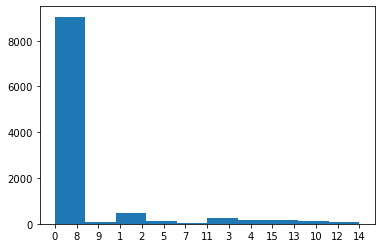

In [42]:
plt.hist(df['heat']);

In [46]:
df['heat'].describe()

count     10506
unique       15
top           0
freq       8913
Name: heat, dtype: object

In [45]:
df['heat'].value_counts()

0     8913
1      316
2      166
4      165
3      138
8      135
11     126
10     109
13     104
5      102
9       70
15      52
7       49
14      42
12      19
Name: heat, dtype: int64

In [47]:
count = 0
for i in df['heat']:
    if i == "M":
        count += 1
print(count)

0


In [ ]:
There are 11M values initially. But now missing?

### Cool

In [ ]:
plt.hist(df['cool'])

In [ ]:
df['cool'].describe()

In [48]:
df['cool'].value_counts()

 0    1865
 6     841
16     830
13     804
11     682
10     640
14     638
 7     636
 8     537
15     536
12     514
 5     436
 9     311
 2     295
17     261
 4     229
19     185
 1     154
21      38
18      35
22      22
 3      17
Name: cool, dtype: int64

In [ ]:
There are 11M values initially. But now missing?

(array([3166., 1494.,  966.,  833., 1011.,  969.,  458.,  519.,  470.,
         620.]),
 array([ 0. ,  6.2, 12.4, 18.6, 24.8, 31. , 37.2, 43.4, 49.6, 55.8, 62. ]),
 <BarContainer object of 10 artists>)

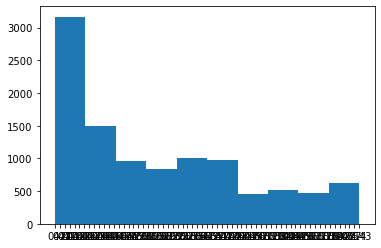

In [141]:
plt.hist(df['sunrise'])

In [142]:
df['sunrise'].describe()

count     10506
unique       63
top           -
freq       2139
Name: sunrise, dtype: object

In [143]:
df['sunrise'].value_counts()

-       2139
0445     617
0416     455
0459     352
0528     337
        ... 
0512      39
0518      28
0557      26
0453      26
0447       5
Name: sunrise, Length: 63, dtype: int64

In [145]:
count = 0
for i in df['sunrise']:
    if i == "-":
        count += 1
print(count)

2139
